## vocabulary:
* swap       - cambiar lugares
* pivot      - girar (eje)
* shallow    - superficial (poco profundo)
* shape      - dimension (forma)
* augmented  - incrementada
* row        - fila

## Order of the class:
* introduction
* arrays, matrices, vectors
* aritmetic operations on vectors / matrices
* matrix multiplication!
* Linear Equations
* Gaussian Elimination
* Implementation of Gaussian Elimination
* Using Numpy to solve set of Linear Equations 

# Linear Algebra

The branch of mathematics that deals with the theory of systems of linear equations, matrices, vector spaces, determinants, and linear transformations.

Computational Linear Algebra a very important topic to be covered throughout this course. We shall cover linear systems of equations, techniques for calculating inverses and determinants and factorization methods.

An interesting fact of Computational Linear Algebra is that it does not comprises numerical approaches as most of the methods are exact. The usage of a computer is then necessary because of the large number of calculations rather than the non-soluble nature of the problems. Numerical errors come then from round-off approximations.

- - -
- [Linear Systems of Equations](#Linear-Systems-of-Equations) 
    - [Matrices and vectors](#Matrices-and-vectors)
    - [Example 1](#Example-1)
    - [Matrices in Python](#Matrices-in-Python)
    - [Basic operations with matrices](#Basic-operations-with-matrices)
- [Gaussian Elimination](#Gaussian-Elimination)
    - [General Gaussian elimination](#General-Gaussian-elimination)
    - [Computing time](#Computing-time)
    - [Example 2](#Example-2)
- [Pivoting Strategies](#Pivoting-Strategies)
    - [Partial pivoting](#Partial-pivoting)
- [Matrix Inversion](#Matrix-Inversion)
- [Determinant of a Matrix](#Determinant-of-a-Matrix)
    - [Calculating determinants](#Calculating-determinants)
    - [Computing time of determinants](#Computing-time-of-determinants)
    - [Properties of determinants](#Properties-of-determinants)
- [LU Factorization](#LU-Factorization)
    - [Derivation of LU factorization](#Derivation-of-LU-factorization)
    - [Algorithm for LU factorization](#Algorithm-for-LU-factorization)

- - -

# Matrices in Python

One of the greatest advantages of high level languages like Python, is the manipulation of complex objects like matrices and vectors. For this part we are going to use advanced capabilities for handling matrices, provided by the library NumPy.

NumPy, besides the extreme useful NumPy array objects, also provides the Matrix objects that are overloaded with proper matrix operations.


<img src="imgs/array_vs_matrix.png" width="600" />
*here the examples are in Matlab!

### Difference between numpy.array, numpy.asarray and numpy.matrix
* numpy.matrix is strictly 2D numbers
* numpy.array and numpy.asarray are for any dimensional array of numbers or characters
* the difference is in the way how numpy.array and numpy.assarray handle the object. The first does a copy of an object and has more options.
* numpy.asarray(x) is like numpy.array(x, copy=False)
* finally my recommendation is to use numpy.array (safer and more flexible)

## What is matrix
A $m \times n$ matrix can be defined as a set of numbers arranged in columns and rows such as (m x n):




$$ A = [a_{ij}] =
\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n} \\
a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots & \dots & \vdots \\
a_{m1} & a_{m2} & \dots & a_{mn}
\end{bmatrix}
$$

In the same way, it is possible to define a $n$-dimensional column vector as (m x 1)

$$ \textbf{x} =
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots\\
x_{m}
\end{bmatrix}
$$

and a row vector (1 x n)

$$ \textbf{y} =
 \begin{bmatrix}
y_{1} &
y_{2} &
\cdots &
y_{n}
\end{bmatrix}$$


In [1]:
import numpy as np

In [2]:
#NumPy Arrays
M1 = np.array( [[ 5 ,-4, 0],
                [-4 , 7,-3],
                [ 0 ,-3, 5]] )

# Convert from list
L1=[[ 5 ,-4, 0],[-4 , 7,-3],[ 0 ,-3, 5]]
M1=np.array(L1)
#print(M1)
# function that converts list of lists to numpy array
#M1=np.random.rand(3,3)

M1=np.random.randint(1,5,(3,3))

#M1 = np.array( [[ 5 ,-4, 0],
#                [-4 , 7,-3],
#                [ 0 ,-3, 5]] )

print('M1=\n',M1)

M1=
 [[3 4 1]
 [3 1 4]
 [3 1 4]]


In [3]:
print(M1.shape)
#result=M1.shape
#print(type(result))
#protected output

(3, 3)


In [4]:
#print('M1 shape={}'.format(M1.shape) )
print(f"M1 shape is {M1.shape}")
result=M1.shape
print(type(result))
# other form

M1 shape is (3, 3)
<class 'tuple'>


## SymPy (Symbolic Python) *digression

In [5]:
import sympy as sp
sp.Matrix(M1)
#x = sympy.Symbol('x') # declare analytical varibles
#sympy.init_printing() # Use LaTeX to print sympy objects

Matrix([
[3, 4, 1],
[3, 1, 4],
[3, 1, 4]])

In [6]:
vector_row = np.array([[1,2,3,4]])

vector_column = np.array([[1], 
                          [2], 
                          [3], 
                          [4]])
print(vector_row.shape)
print(vector_column.shape)

(1, 4)
(4, 1)


In [7]:
print(vector_row)

[[1 2 3 4]]


In [8]:
print(vector_column)

[[1]
 [2]
 [3]
 [4]]


In [9]:
sp.Matrix(vector_row)

Matrix([[1, 2, 3, 4]])

In [10]:
sp.Matrix(vector_column)

Matrix([
[1],
[2],
[3],
[4]])

In [11]:
M1=np.random.randint(1,5,(3,3))
M2=np.random.randint(1,5,(3,3))

print('M1 =\n',M1)
print()
print('M2 =\n',M2)

M1 =
 [[4 1 2]
 [4 3 1]
 [4 4 2]]

M2 =
 [[2 2 3]
 [3 1 4]
 [2 1 1]]


## Arithmetic array operations
Arithmetic array operations +, -, /, * and ** are performed elementwise on NumPy arrays.
That means that the shape of array $A$ and array $B$ has to AGREE in order to use +, -, /, *  operations

## Matrix addition:

(m x n) + (m x n) = (m x n)

In [12]:
print('M1=\n',M1)
print('M2=\n',M2)
print('M1+M2=\n',M2+M1)
# arithmetic operations are commutative

M1=
 [[4 1 2]
 [4 3 1]
 [4 4 2]]
M2=
 [[2 2 3]
 [3 1 4]
 [2 1 1]]
M1+M2=
 [[6 3 5]
 [7 4 5]
 [6 5 3]]


## Matrix subtraction:
(m x n) - (m x n) = (m x n)

In [13]:
print('M1=\n',M1)
print('M2=\n',M2)
print('M1+M2=\n',M1-M2)

M1=
 [[4 1 2]
 [4 3 1]
 [4 4 2]]
M2=
 [[2 2 3]
 [3 1 4]
 [2 1 1]]
M1+M2=
 [[ 2 -1 -1]
 [ 1  2 -3]
 [ 2  3  1]]


## Matrix multiplicacion aritmetica:
(m x n) * (m x n) = (m x n)

In [14]:
print('M1=\n',M1)
print('M2=\n',M2)
print('M2*M1=\n',M2*M1)

M1=
 [[4 1 2]
 [4 3 1]
 [4 4 2]]
M2=
 [[2 2 3]
 [3 1 4]
 [2 1 1]]
M2*M1=
 [[ 8  2  6]
 [12  3  4]
 [ 8  4  2]]


## Scalar Matrix Operations

x +*-/ (m x n) = (m x n)

In [15]:
x=5
print('x=\n',x)
print('M1=\n',M1)
print('x=M2=\n',x+M1)

x=
 5
M1=
 [[4 1 2]
 [4 3 1]
 [4 4 2]]
x=M2=
 [[9 6 7]
 [9 8 6]
 [9 9 7]]


In [16]:
x=5
print('x=\n',x)
print('M1=\n',M1)
print('x*M2=\n',x*M1)

x=
 5
M1=
 [[4 1 2]
 [4 3 1]
 [4 4 2]]
x*M2=
 [[20  5 10]
 [20 15  5]
 [20 20 10]]


### Matrix Multiplication (matrix dot product, not aritmetic *)
Second way of multiplication of arrays:

it's not commutative $ [A] [B] \neq [B] [A] $

<img src="imgs/matrix_multiplication2.png" width="400" />

(m x n)  (n x m) = (m x m)
<img src="imgs/matrix_multiplication1.png" width="400" />
<img src="imgs/matrix_multiplication3.png" width="600" />

In [17]:
M1=np.random.randint(1,5,(3,5))
M2=np.random.randint(1,5,(5,3))
# (3,5) (5,3) = (3,3)
print('M1=\n',M1)
print('M2=\n',M2)
#arithmetic M1*M2
#dot product:
print('M1.M2=\n',np.matmul(M1,M2))

M1=
 [[3 4 4 3 3]
 [1 1 2 2 4]
 [3 1 2 1 4]]
M2=
 [[2 2 4]
 [1 4 2]
 [3 2 1]
 [1 4 3]
 [1 1 1]]
M1.M2=
 [[28 45 36]
 [15 22 18]
 [18 22 23]]


In [18]:
M1=np.random.randint(1,5,(1,5))
M2=np.random.randint(1,5,(5,9))
# (1,5) (5,9) = (1,9)
print('M1=\n',M1)
print('M2=\n',M2)
print('M1.M2=\n',np.matmul(M1,M2))

M1=
 [[1 2 4 3 4]]
M2=
 [[2 4 3 2 4 2 1 3 3]
 [3 1 1 4 2 2 4 1 3]
 [4 2 3 3 1 1 4 2 3]
 [1 2 4 1 3 3 4 2 4]
 [2 1 2 1 4 2 4 3 2]]
M1.M2=
 [[35 24 37 29 37 27 53 31 41]]


In [19]:
vector_row = np.array([[1, -5, 3, 2]])
vector_column = np.array([[1], 
                          [2], 
                          [3], 
                          [4]])
print(vector_row.shape)
print(vector_column.shape)

(1, 4)
(4, 1)


In [20]:
print('matmul(vector_row,vector_column)')
print("(1,4)(4,1) = (1,1)\n")
print(np.matmul(vector_row,vector_column),'\n')

print('\n')
print('matmul(vector_column,vector_row)')
print("(4,1)(1,4) = (4,4)\n")
print(np.matmul(vector_column,vector_row))


matmul(vector_row,vector_column)
(1,4)(4,1) = (1,1)

[[8]] 



matmul(vector_column,vector_row)
(4,1)(1,4) = (4,4)

[[  1  -5   3   2]
 [  2 -10   6   4]
 [  3 -15   9   6]
 [  4 -20  12   8]]


# Danger
Shallow copy vs deep copy !!!

### Shallow copy:

In [21]:
list1=['a','b']
list2=list1
print(list1)
print(list2)

['a', 'b']
['a', 'b']


In [22]:
list1[0]='d'
print()
print(list1)
print(list2)


['d', 'b']
['d', 'b']


In [23]:
# shallow copy
A=np.random.randint(1,5,(3,3))
B=A
print(A,'\n')
print(B)

[[1 3 4]
 [4 4 3]
 [4 2 1]] 

[[1 3 4]
 [4 4 3]
 [4 2 1]]


In [24]:
A[0,0]=99
print(A,'\n')
print(B)

[[99  3  4]
 [ 4  4  3]
 [ 4  2  1]] 

[[99  3  4]
 [ 4  4  3]
 [ 4  2  1]]


### Deep copy:

In [25]:
# deep copy
A=np.random.randint(1,5,(3,3))
B=A.copy()
print(A,'\n')
print(B)

[[4 3 3]
 [3 2 2]
 [2 2 3]] 

[[4 3 3]
 [3 2 2]
 [2 2 3]]


In [26]:
A[0,0]=99
print(A,'\n')
print(B)

[[99  3  3]
 [ 3  2  2]
 [ 2  2  3]] 

[[4 3 3]
 [3 2 2]
 [2 2 3]]


# Changing Matrix's type:

In [47]:
M=np.random.randint(1,5,(3,3))

In [48]:
M

array([[2, 1, 2],
       [4, 4, 1],
       [1, 1, 3]])

In [50]:
M.astype(float)

array([[2., 1., 2.],
       [4., 4., 1.],
       [1., 1., 3.]])

In [51]:
M = 0.5*M

In [52]:
M

array([[1. , 0.5, 1. ],
       [2. , 2. , 0.5],
       [0.5, 0.5, 1.5]])

Numpy también tiene varias funciones matemáticas. Por ejemplo: 
* `np.sum()` - calcula la suma de valores de una array
* `np.min()` - busca el elemento mínimo de una array
* `np.max()`  - busca el elemento máximo de una array
* `np.mean()` - calcula el valor promedio de una array
* `np.std()`  - calcula el valor promedio de una array
* `np.argmax()` - devuelve el índice con valor máximo de una array
* `np.argmin()` - devuelve el índice con valor mínimo de una array
* `np.where()` - devuelve índices de array donde una condición es True o False

## Useful numpy methods 

* `np.random.randint` - quickly create random matrix
* `np.eye` - Identity matrix   
* `np.vstack` - concatenates matrices vertically (input is a tuple)
* `np.hstack` - concatenates matrices horizontally (input is a tuple)
* `np.hsplit` - splits matrices horizontally
* `np.vsplit` - splits matrices vertically
(you will see how useful during your next exercise...)  



In [32]:
A=np.random.randint(0,9,(3,3))
print(A)

[[5 2 6]
 [4 6 8]
 [6 1 7]]


In [33]:
I=np.eye(3)
print(I)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [34]:
AI=np.vstack((A,I))
print(AI)

[[5. 2. 6.]
 [4. 6. 8.]
 [6. 1. 7.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [55]:
A,I=np.vsplit(AI,2)
print(A)
print()

print(I)
print()



[[5. 2. 6.]
 [4. 6. 8.]
 [6. 1. 7.]]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]



# Systems of Linear Equations

A linear system is a set of equations of $n$ variables that can be written in a general form:

$$ a_{11}x_1 + a_{12}x_2 + \cdots a_{1n}x_n = b_1 $$
$$\vdots$$
$$ a_{m1}x_1 + a_{m2}x_2 + \cdots a_{mn}x_n = b_m $$

where $n$ is, again, the number of variables, and $m$ the number of equations. 

A linear system has solution if and only if $m\geq n$. This leads us to the main objetive of a linear system, find the set $\{x_i\}_{i=0}^n$ that fulfills all the equations.

Although there is an intuitive way to solve this type of systems, by just adding and subtracting equations until reaching the desire result, the large number of variables of some systems found in physics and astronomy makes necessary to develop iterative and general approaches. Next, we shall introduce matrix and vector notation and some basic operations that will be the basis of the methods to be developed in this section.

A $m \times n$ matrix can be defined as a set of numbers arranged in columns and rows such as:

$$ A = [a_{ij}] = 
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & & \vdots\\
a_{m1} & a_{m2} & \cdots & a_{mn} 
\end{bmatrix} $$

In the same way, it is possible to define a $n$-dimensional column vector as

$$ \textbf{x} = \begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots\\
x_{n} 
\end{bmatrix} $$

and a row vector 

$$ \textbf{y} = \begin{bmatrix}
y_{1} &
y_{2} &
\cdots &
y_{n} 
\end{bmatrix} $$

The system of equations 

$$ a_{11}x_1 + a_{12}x_2 + \cdots a_{1n}x_n = b_1 $$
$$\vdots$$
$$ a_{m1}x_1 + a_{m2}x_2 + \cdots a_{mn}x_n = b_m $$

can be then written in a more convenient way as

$$ A \textbf{x} =  \begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & & \vdots\\
a_{m1} & a_{m2} & \cdots & a_{mn} 
\end{bmatrix} 
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots\\
x_{n} 
\end{bmatrix}  = b = 
\begin{bmatrix}
b_{1} \\
b_{2} \\
\vdots\\
b_{n} 
\end{bmatrix}$$


We can also introducing the $n\times (n+1)$ **augmented matrix** as

$$[A:\textbf{b}] =  \begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} & \vdots & b_1 \\
a_{21} & a_{22} & \cdots & a_{2n} & \vdots & b_2 \\
\vdots & \vdots & & \vdots & \vdots & \vdots \\
a_{m1} & a_{n2} & \cdots & a_{nn} & \vdots & b_n
\end{bmatrix}$$

## Solution:  Gaussian Elimination ( or Gauss-Jordan)
The best way to do it manually:

The goal is to have  all the elements below diagonal equal $0$
but making some operation on the matrix one must not change the general solution.

* can we swap rows? yes
* can we multiply both sides of an equation by a number ($\lambda$) ? yes
* can you add one row to the other row? yes
* can we swap columns? no


In other words we allowed to: 

- Interchange rows. (Notation: $R_i \leftarrow \rightarrow R_j$) - called pivoting
- Multiply a row by a constant. (Notation: $ \lambda R_i$)
- Add the product of a row multiplied by a constant to another row. (Notation: $R_i+\lambda R_j$)

none of the above operation will change the solution!
but we organize the coefficients in such a way that it will be easier to find the solution


$$[A:\textbf{b}] =  \begin{bmatrix}
1 & 0 & 0  & b_1 \\
0 & 1 & 0  & b_2 \\
0 & 0 & 1  & b_1 \\
\end{bmatrix}$$

* called Reduced Row Echelon Form

because that would convert to:

$$1 x_1 +  0 x_2 + 0 x_3 = b_1$$
$$0 x_1 +  1 x_2 + 0 x_3 = b_2$$
$$0 x_1 +  0 x_2 + 1 x_3 = b_3$$

$$x_1=b_1$$
$$x_2=b_2$$
$$x_3=b_3$$

## Example

$$-3 x + 6 y - 9 z = 3$$
$$ \ 1 x - 1 y - 2 z = 0$$
$$ 5 x + 5 y - 7 z = 63$$

in the augmented form:

$$\begin{bmatrix}
-3 &  6 & -9  & 3 \\
1  & -1 & -2  & 0 \\
5  &  5 & -7  & 63 \\
\end{bmatrix}$$

Divide row 1 by -3

$$\begin{bmatrix}
1 &  -2 & 3  & -1 \\
1  & -1 & -2  & 0 \\
5  &  5 & -7  & 63 \\
\end{bmatrix}$$

add (-1)* row 1 to row 2

$$\begin{bmatrix}
1 &  -2 & 3  & -1 \\
0  & 1 & -5  & 1 \\
5  &  5 & -7  & 63 \\
\end{bmatrix}$$

add (-5)* row 1 to row 3

$$\begin{bmatrix}
1 &  -2 & 3  & -1 \\
0  & 1 & -5  & 1 \\
0  &  15 & -22  & 68 \\
\end{bmatrix}$$

add (-15)* row 2 to row 3

$$\begin{bmatrix}
1 &  -2 & 3  & -1 \\
0  & 1 & -5  & 1 \\
0  &  0 & 53  & 53 \\
\end{bmatrix}$$

divide row 3 by 53

$$\begin{bmatrix}
1 &  -2 & 3  & -1 \\
0  & 1 & -5  & 1 \\
0  &  0 & 1  & 1 \\
\end{bmatrix}$$

add (5)* row 3 to row 2

$$\begin{bmatrix}
1 &  -2 & 3  & -1 \\
0  & 1 & 0  & 6 \\
0  &  0 & 1  & 1 \\
\end{bmatrix}$$

add (-3)* row 3 to row 1

$$\begin{bmatrix}
1 &  -2 & 0  & -4 \\
0  & 1 & 0  & 6 \\
0  &  0 & 1  & 1 \\
\end{bmatrix}$$

add row 2 to row 1

$$\begin{bmatrix}
1 &  0 & 0  & 8 \\
0  & 1 & 0  & 6 \\
0  &  0 & 1  & 1 \\
\end{bmatrix}$$

* called Reduced Row Echelon Form

$$1 x +  0 y + 0 z = 8$$
$$0 x +  1 y + 0 z = 6$$
$$0 x +  0 y + 1 z = 1$$

$$x=8$$
$$y=6$$
$$z=1$$

## How to implement the three operations in Python:
* multiplying row by number $\lambda$
* adding one row to another row (multiplied by a number)
* swapping rows (pivoting)


1. The $i$-th row $E_i$ can be multiplied by a non-zero constant $\lambda$, and then a new row used in place of $E_i$, i.e. $(E_i)\rightarrow (\lambda E_i)$. We denote this operation as $\operatorname{Lamb}(E_i,\lambda)$.
2. The $j$-th row $E_j$ can be multiplied by a non-zero constant $\lambda$ and added to some row $E_i$. The resulting value take the place of $E_i$, i.e. $(E_i) \rightarrow (E_i + \lambda E_j)$. We denote this operation as $\operatorname{Comb}(E_i,E_j,\lambda)$.
3. Finally, we define a swapping of two rows as $(E_i)\leftrightarrow (E_j)$, denoted as $\operatorname{Swap}(E_i,E_j)$

* `row_lamb(i, λ, A)`: `i` is the row to be changed, `λ` the multiplicative factor and `A` the matrix. This function should return the new matrix with the performed operation $(\lambda E_i)\rightarrow (E_i)$.
* `row_swap(i, j, A)`: `i` and `j` are the rows to be swapped. This function should return the new matrix with the performed operation $(E_i)\leftrightarrow (E_j)$.
* `row_comb(i, j, λ, A)`: `i` is the row to be changed, `j` the row to be added, `λ` the multiplicative factor and `A` the matrix. This function should return the new matrix with the performed operation $(E_i + \lambda E_j)\rightarrow (E_i)$.

In [13]:
import numpy as np
A = np.array( [[ -3 ,6, -9],
                [1 , -1,-2],
                [5 ,5, -7]] )
print(A,'\n')

[[-3  6 -9]
 [ 1 -1 -2]
 [ 5  5 -7]] 



#### it is important that the matrix is of float, because

In [22]:
print(A,'\n')
print('\n')

A[0,0]=A[0,0]*1.5
print(A,'\n')



[[-3  6 -9]
 [ 1 -1 -2]
 [ 5  5 -7]] 



[[-4  6 -9]
 [ 1 -1 -2]
 [ 5  5 -7]] 



In [21]:
B=A.copy()
B=B.astype('float64')
print(B,'\n')

B[0,0]=B[0,0]*1.5
print(B,'\n')

[[-3.  6. -9.]
 [ 1. -1. -2.]
 [ 5.  5. -7.]] 

[[-4.5  6.  -9. ]
 [ 1.  -1.  -2. ]
 [ 5.   5.  -7. ]] 



#### three row operations implemented as functions

In [4]:
#Force the matrix has type float
## why we check only first element...
def row_lamb( i, λ, A ):
    B = A.copy()
    if isinstance(B[0,0],np.int64):
        B=B.astype(float)
    B[i] = λ*B[i]
    return B

def row_swap( i, j, A ):
    B = A.copy()
    B[[i,j]] = B[[j,i]]
    return B

def row_comb( i, j, λ, A ):
    B = A.copy()
    if isinstance(B[0,0],np.int64):
        B=B.astype(float)
    B[i] = λ*B[j] + B[i]
    return B

#### swapping rows

In [5]:
print(A)
B=row_swap( 0, 1 , A )
print()
print(B)

[[-3.  6. -9.]
 [ 1. -1. -2.]
 [ 5.  5. -7.]]

[[ 1. -1. -2.]
 [-3.  6. -9.]
 [ 5.  5. -7.]]


#### multiplying row by a scalar

In [11]:
A = np.array( [[ -3 ,6, -9],
                [1 , -1,-2],
                [5 ,5, -7]] )
print(A,'\n')
B=row_lamb( 0, -1/3 , A )
print(B)

[[-3  6 -9]
 [ 1 -1 -2]
 [ 5  5 -7]] 

[[ 1. -2.  3.]
 [ 1. -1. -2.]
 [ 5.  5. -7.]]


#### multiplying row "j" by a scalar and adding the result to row "i"

In [12]:
A = np.array( [[ -3 ,6, -9],
                [1 , -1,-2],
                [5 ,5, -7]] )
print(A,'\n')

B=row_comb(0,1,0,A)
print(B,'\n')

[[-3  6 -9]
 [ 1 -1 -2]
 [ 5  5 -7]] 

[[-3.  6. -9.]
 [ 1. -1. -2.]
 [ 5.  5. -7.]] 



# Simplified Gaussian Elimination

* In order to solve System of Linear Equations it is not necessary to get to row reduced echelon form
* We can actually stop our operations at point where we did:

divide row 3 by 53

$$\begin{bmatrix}
1 &  -2 & 3  & -1 \\
0  & 1 & -5  & 1 \\
0  &  0 & 1  & 1 \\
\end{bmatrix}$$

Because at this point we can use substitution to get the values of x,y,z:

$$\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1(n-1)} & a_{1n} & \vdots & \hat b_1 \\
0 & a_{22} & \cdots & a_{2(n-1)} & a_{2n} & \vdots & \hat b_2 \\
\vdots & \vdots &  & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \cdots & a_{(n-1)(n-1)} & a_{(n-1)n} & \vdots & \hat b_{n-1} \\
0 & 0 & \cdots & 0 & 1 & \vdots & \hat b_n
\end{bmatrix}$$

**8.** The solution to the problem is then obtained through backward substitutions, i.e.

$$x_n = \hat b_n$$
$$ x_{n-1} =  \frac{\hat b_{n-1} + a_{(n-1)n}x_n}{a_{(n-1)(n-1)}}$$
$$\vdots$$
$$x_i = \frac{\hat b_i - \sum_{j=i+1}^n a_{ij}x_j}{a_{ii}}\ \ \ \ \mbox{for}\ \ \ i=n-1, n-2, \cdots, 1$$

Now, we shall describe the general procedure for Gaussian elimination: 

**1.** Give an augmented matrix $\hat{A}=[A:\textbf{b}]$.

**2.** Find the first non-zero coefficient $a_{i1}$ associated to $x_1$. This element is called **pivot**.

**3.** Apply the operation $Swap(E_1,E_i)$. This guarantee the first row has a non-zero coefficient $a_{11}$.

**4.** Apply the operation $Comb(E_j,E_1,-a_{j1}/a_{11})$. This eliminates the coefficients associated to $x_1$ in all the rows but in the first one.

**5.** Repeat steps **2** to **4** but for the coefficients of $x_2$ and then $x_3$ and so up to $x_n$. When iterating the coefficients of $x_{k}$, do not take into account the first $k$-th rows as they are already sorted.

**6.** Once you obtain a diagonal form of the matrix, apply the operation $Lamb(E_n,1/a_{nn})$. This will make the coefficient of $x_n$ in the last equation equal to 1.

**7.** The final result should be an augmented matrix of the form:

**8.** The solution to the problem is then obtained through backward substitutions, i.e.



In [51]:
#Gaussian Elimination
def upper_diagonal(A0):
    #Making local copy of matrix
    A=A0
    A = np.copy(A0)
    #Detecting size of matrix
    n = len(A)
    
    #Sweeping all the columns in order to eliminate coefficients of the i-th variable
    for i in range( 0, n ):
        
        #Sweeping all the rows for the i-th column in order to find the first non-zero coefficient
        for j in range( i, n ):
            if A[i,j] != 0:
                #Normalization coefficient
                Norm = 1.0*A[i,j]
                break
                
        #Applying swap operation to put the non-zero coefficient in the i-th row
        A = row_swap( i, j, A )
        
        #Eliminating the coefficient associated to the i-th variable
        for j in range( i+1, n ):
            A = row_comb( j, i, -A[j,i]/Norm, A )
            
    #Normalizing n-th variable
    A = row_lamb( n-1, 1.0/A[n-1,n-1], A )

    return A

def eliminate(A0):
    #Making local copy of matrix
    A = np.copy(A0)

    #Detecting size of matrix
    n = len(A)
    
    #Finding solution
    x = np.zeros( n )
    x[n-1] = A[n-1,n]
    for i in range( n-1, -1, -1 ):
        x[i] = ( A[i,n] - sum(A[i,i+1:n]*x[i+1:n]) )/A[i,i]
    
    #Upper diagonal matrix and solutions x
    return x

#### converting non-augmented matrix to upper diagonal only

In [52]:
#Generating random matrix
import numpy as np
M = np.array( [[ -3 ,6, -9],
                [1 , -1,-2],
                [5 ,5, -7]] )

D = upper_diagonal(M)
print ("Upper Diagonal Matrix D:\n", D, "\n")

Upper Diagonal Matrix D:
 [[-3.  6. -9.]
 [ 0.  1. -5.]
 [ 0.  0.  1.]] 



#### converting augmented matrix to upper diagonal

In [54]:
#Generating random matrix
import numpy as np
M = np.array( [[ -3 ,6, -9, 3],
                [1 , -1,-2, 0],
                [5 ,5, -7, 63]] )

print("Augmented Matrix M:\n", M, "\n")
#Solving using Gaussian Elimination
D = upper_diagonal(M)
print ("Upper Diagonal Matrix D:\n", D, "\n")

Augmented Matrix M:
 [[-3  6 -9  3]
 [ 1 -1 -2  0]
 [ 5  5 -7 63]] 

Upper Diagonal Matrix D:
 [[-3.  6. -9.  3.]
 [ 0.  1. -5.  1.]
 [ 0.  0.  1.  1.]] 



#### eliminating to find the solution

In [55]:
x = eliminate(D)
print ("Obtained solution:\n", x, "\n")

Obtained solution:
 [8. 6. 1.] 



## Gaussian Elimination can be also useful to find the determinant of the matrix
- this time the elimination must be stopped until the upper triangular matrix. Now according to the theory its we only must make a product of the diagonal elements multiplied by -1
* make at least one element float

## Solving the previous example with numpy is even easier:
* np.linalg.solve(A,b) - LU decomposition, Not Gaussian Elimination

$$-3 x + 6 y - 9 z = 3$$
$$ \ 1 x - 1 y - 2 z = 0$$
$$ 5 x + 5 y - 7 z = 63$$




In [50]:
A = np.array( [[ -3 ,6, -9],
                [1 , -1,-2],
                [5 ,5, -7]] )

b= np.array([[3],
             [0],
             [63]])

print('Solving: Ax=b\n')
print('A=\n',A)
print()
print('b=\n',b)

Solving: Ax=b

A=
 [[-3  6 -9]
 [ 1 -1 -2]
 [ 5  5 -7]]

b=
 [[ 3]
 [ 0]
 [63]]


In [44]:
x=np.linalg.solve(A, b)
print(x)

[[8.]
 [6.]
 [1.]]


# Class exercises 1:

Consider a circuit:
<img src="imgs/homework_circuit.png" width="700" />

`-R1*I1 -R2*I2 -R3*I3 + 0*I4 + 0*I5 + 0*I6`

primera fila de matrix `A`:
    
`-R1, -R2, -R3,  0,  0,  0`

The set of linear equations comes from the Kirchhoff's rules (in case of doubts review the literature)

Find the currents $I_1 \cdots I_6$ knowing that the 

Resistances are:

$R_1=1 \Omega$,
$R_2=2 \Omega$,
$R_3=3 \Omega$,
$R_4=4 \Omega$,
$R_5=5 \Omega$

Voltages are:
$E_1=10 V$,
$E_2=40 V$

In [45]:
A=np.array([[],
            [],
            []])

In [46]:
A=np.array([[1,2,3],
            [4,5,6],
            [7,8,9]]) 
print (A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


# Class exercise 2

In [68]:
x=np.linspace(1,3*np.pi/1.5,50)
y = np.sin(x)
np.savetxt('xvec.txt', x)
np.savetxt('yvec.txt', y)

In [69]:
import numpy as np
x=np.loadtxt('xvec.txt')
y=np.loadtxt('yvec.txt')

Text(0.5, 0, 'y')

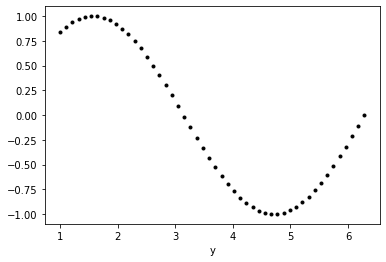

In [71]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
ax.plot(x,y,'.k')
ax.set_xlabel('x')
ax.set_xlabel('y')

#### find x for which y is minimum